In [1]:
import numpy as np
import os
import glob
import pandas as pd
from statsmodels.sandbox.stats.multicomp import multipletests
import numpy as np
from subprocess import call
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
dir_pre = "/mnt/hpc/home/xuxinran/DirectSeq/data/zhaolin_240206/240201-zhaolin-RNA-merge/v0.7.2/pseU/nano_merge"

output_all_path = f"{dir_pre}_pseU_summary.csv"

In [12]:
files = glob.glob(f'{dir_pre}_haplotype_chr*_tmp.csv')
dfs = [pd.read_csv(file) for file in files]
df = pd.concat(dfs, ignore_index=True)
df = df.sort_values(by=['chrom', 'pseU_pos_1base', 'snp_pos_1base'])
df = df.reset_index(drop=True)

In [15]:
print("pvalue小于0.05的个数：", len(df[df['p_value']<0.05]))
print("fdr小于0.1的个数：", len(df[df['FDR']<0.1]))
print("pseUqtl同时也是pseU的个数： ", len(df[(df['ispseU?']=="Yes")&(df['p_value']<0.05)]))
df.to_csv(output_all_path, index=False)
call(f'rm {dir_pre}_haplotype_chr*_tmp.csv', shell=True)

pvalue小于0.05的个数： 1272
fdr小于0.1的个数： 23
pseUqtl同时也是pseU的个数：  0


rm: cannot remove '/mnt/hpc/home/xuxinran/DirectSeq/data/zhaolin_240206/240201-zhaolin-RNA-merge/v0.7.2/pseU/nano_merge_haplotype_chr*_tmp.csv': No such file or directory


1

Genomic inflation factor (λGC): 0.97


/tmp/ipykernel_32035/3248741775.py:6: RuntimeWarning: divide by zero encountered in log10
  observed = -np.log10(np.sort(p_values))


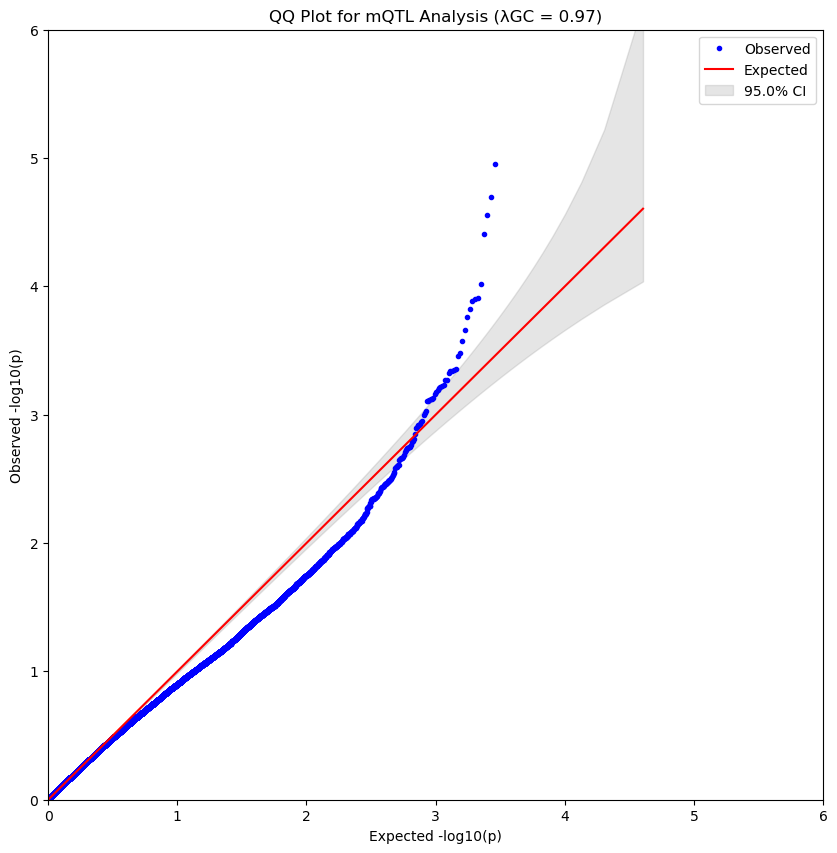

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_qq(p_values, title, ci=0.95):
    observed = -np.log10(np.sort(p_values))
    expected = -np.log10(np.linspace(1/len(p_values), 1, len(p_values)))
    
    plt.figure(figsize=(10, 10))
    plt.plot(expected, observed, 'b.', label='Observed')
    plt.plot([0, max(expected)], [0, max(expected)], 'r-', label='Expected')
    
    # 添加置信区间
    ci_lower = -np.log10(stats.beta.ppf((1-ci)/2, np.arange(1, len(p_values)+1), np.arange(len(p_values), 0, -1)))
    ci_upper = -np.log10(stats.beta.ppf(1-(1-ci)/2, np.arange(1, len(p_values)+1), np.arange(len(p_values), 0, -1)))
    plt.fill_between(expected, ci_lower, ci_upper, color='gray', alpha=0.2, label=f'{ci*100}% CI')
    
    plt.xlabel('Expected -log10(p)')
    plt.ylabel('Observed -log10(p)')
    plt.title(title)
    plt.legend()
    ax = plt.gca()
    ax.set_xlim([0, 6])
    ax.set_ylim([0, 6])
    ax.set_xticks(np.arange(0, 7, 1))
    ax.set_yticks(np.arange(0, 7, 1))
    plt.show()

# 计算基因组通胀因子
def genomic_inflation_factor(p_values):
    chi2_obs = stats.chi2.ppf(1 - p_values, df=1)
    return np.median(chi2_obs) / stats.chi2.ppf(0.5, 1)

# 使用示例
col = 'p_value'
d = df.dropna(subset=[col])
lambda_gc = genomic_inflation_factor(d[col])
print(f"Genomic inflation factor (λGC): {lambda_gc:.2f}")

plot_qq(d[col], f'QQ Plot for mQTL Analysis (λGC = {lambda_gc:.2f})')